# Рынок заведений общественного питания Москвы

Цель проекта: исследовать рынок питания Москвы и выявить особенности, которые помогут найти подходящее место для открытия нового заведения.  

Задачи:  
1. узнать, как распределяются заведения по категориям;  
2. выявить популярные сетевые заведения;  
3. проанализировать средние рейтинги и средние чеки заведений по районам;  
4. охарактеризовать кофейни и дать рекомендации для открытия нового заведения.

## Описание данных

- Датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация могла быть добавлена пользователями или найдена в общедоступных источниках.  

Файл moscow_places.csv:
- name — название заведения;
- address — адрес заведения;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- lat — широта географической точки, в которой находится заведение;
- lng — долгота географической точки, в которой находится заведение;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым
1 — заведение является сетевым
- district — административный район, в котором находится заведение, например Центральный административный округ;
- seats — количество посадочных мест.

## Загрузка данных

In [162]:
#загружаем нужные библиотеки
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 

In [163]:
pip install folium

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [164]:
from folium import Map, Choropleth
from folium.plugins import MarkerCluster
from folium import Map, Marker

In [165]:
#загружаем данные
try:
    df = pd.read_csv('/datasets/moscow_places.csv')
    
except:
    df =  pd.read_csv('moscow_places.csv')

In [166]:
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


В датасете представлено 8406 заведений.

## Предобработка данных

In [168]:
# ищем дубликаты 
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


In [169]:
# приводим названия заведений к нижнему регистру
df['name'] = df['name'].str.lower()
df['address'] = df['address'].str.lower()
# проверяем на неявные дубликаты
print('Количество дубликатов:', df.duplicated(subset=['name', 'address']).sum())
df=df.drop_duplicates(subset=['name', 'address'], keep='first')
print('Количество заведений:', len(df))

Количество дубликатов: 4
Количество заведений: 8402


Удалили 4 дубликата, теперь всего 8402 заведений.

In [170]:
# посмотрим, есть ли неявные дубликаты в категориях заведений
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Дубликатов не обнаружено.

In [171]:
# ищем пропуски
print(df.isna().sum())

name                    0
category                0
address                 0
district                0
hours                 535
lat                     0
lng                     0
rating                  0
price                5087
avg_bill             4586
middle_avg_bill      5253
middle_coffee_cup    7867
chain                   0
seats                3610
dtype: int64


Пропуски есть в столбцах с режимом работы (hours), категорией цен в заведении (price), средней стоимостью заказа (avg_bill) и оценкой среднего чека (middle_avg_bill), оценкой одной чашки капучино (middle_coffee_cup), а также количеством посадочных мест (seats). Такие пропуски мы не можем ни обработать, ни удалить (так как они составляют большую часть датасета), поэтому оставляем их как есть.

In [172]:
# cоздаем столбец street с названиями улиц
df['street'] = df['address'].str.split(', ').str[1]
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица дыбенко
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица дыбенко
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,клязьминская улица
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица маршала федоренко
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0,правобережная улица


In [173]:
# cоздаем столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно
df['is_24/7'] = df['hours'].str.contains('ежедневно, круглосуточно')
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица дыбенко,False
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица дыбенко,False
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,клязьминская улица,False
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица маршала федоренко,False
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0,правобережная улица,False


Предобработка данных проведена, приступаем к анализу.

##  Анализ данных

### Количество объектов общественного питания по категориям

In [174]:
# количество объектов общественного питания по категориям
categories = df.groupby(['category']).agg({'name':'count'})
categories.columns=['amount']
categories=categories.sort_values(by='amount', ascending=False)
categories

,amount
category,
кафе,2376
ресторан,2042
кофейня,1413
"бар,паб",764
пиццерия,633
быстрое питание,603
столовая,315
булочная,256


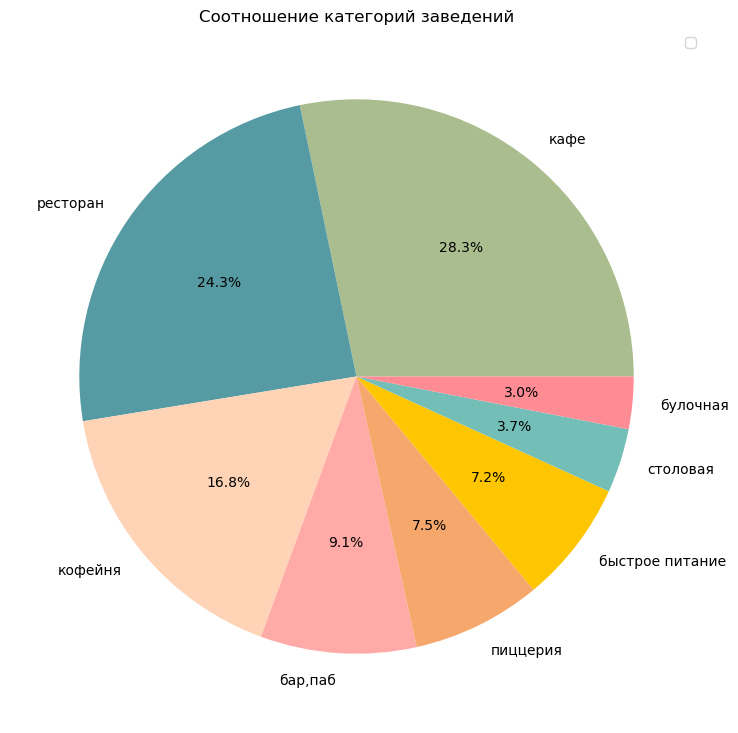

In [175]:
# визуализируем
plt.rcParams['figure.figsize'] = [13, 9] #корректируем размер графика
categories.plot(kind='pie', subplots=True, autopct='%1.1f%%', colors=['#aabd8e', '#569BA3', '#FFD3B5', '#FFAAA6', '#f5a76c', '#fec601', '#73bfb8', '#FF8C94'])
plt.legend('')
plt.title('Соотношение категорий заведений')
plt.xlabel('')
plt.ylabel('');

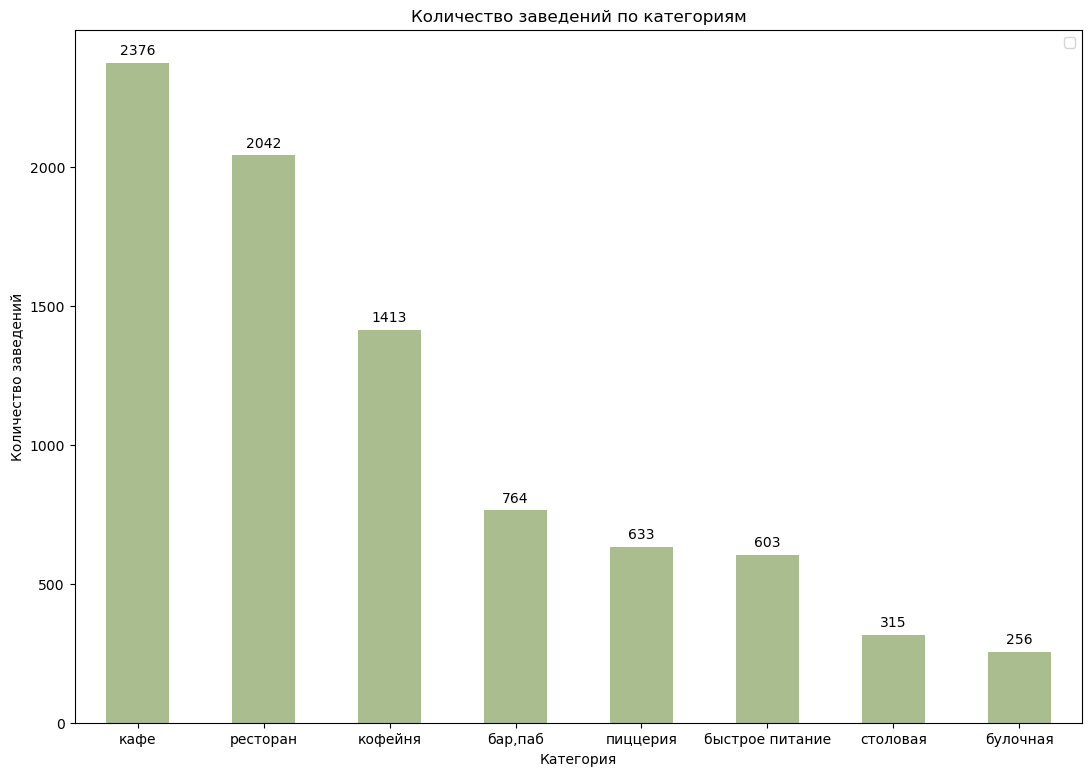

In [176]:
plt.rcParams['figure.figsize'] = [13, 9]
splot=categories.plot(kind='bar', color='#aabd8e')
#добавляем подписи на столбцах
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.legend('')
plt.title('Количество заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.xticks(rotation=0);

Больше половины заведений общественного питания в Москве составляют кафе и рестораны, также популярны кофейни. Меньше всего оказалось булочных (их всего 256) и столовых (315 штук).

### Количество посадочных мест в заведениях по категориям

In [177]:
# количество посадочных мест в заведениях по категориям
seats_cat = df.groupby(['category']).agg({'seats':'count'}).sort_values(by='seats', ascending=False)
seats_cat

,seats
category,
ресторан,1269
кафе,1217
кофейня,751
"бар,паб",467
пиццерия,427
быстрое питание,349
столовая,164
булочная,148


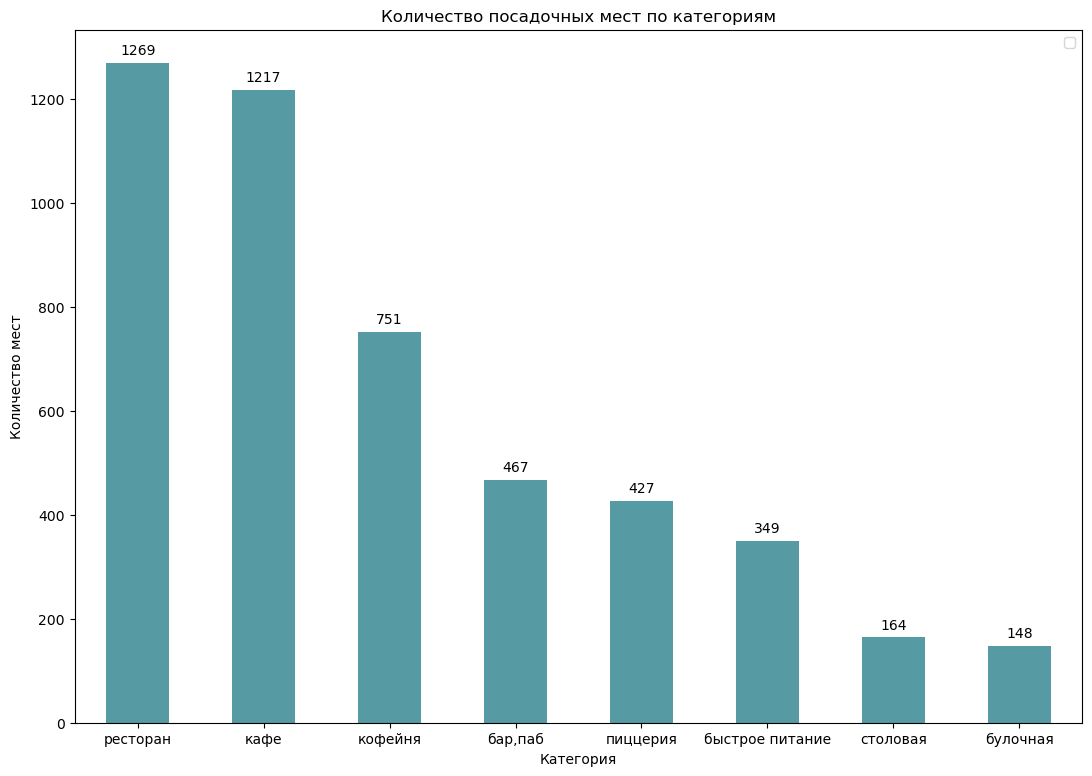

In [178]:
# строим гистограмму
plt.rcParams['figure.figsize'] = [13, 9]
seats_cat_plot=seats_cat.plot(kind='bar', color='#569BA3')
for p in seats_cat_plot.patches:
    seats_cat_plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.legend('')
plt.title('Количество посадочных мест по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество мест')
plt.xticks(rotation=0);

In [179]:
# посмотрим подробнее: среднее, минимальное и максимальное количество мест
seats_amt = df.pivot_table(index=['category'], values=['seats'],
                               aggfunc=['count', 'mean', 'median', 'min', 'max']).reset_index()
seats_amt.columns = ['category', 'amount', 'mean', 'median', 'min', 'max']
round(seats_amt)

,category,amount,mean,median,min,max
0,"бар,паб",467,124.0,82.0,0.0,1288.0
1,булочная,148,89.0,50.0,0.0,625.0
2,быстрое питание,349,99.0,65.0,0.0,1040.0
3,кафе,1217,97.0,60.0,0.0,1288.0
4,кофейня,751,111.0,80.0,0.0,1288.0
5,пиццерия,427,94.0,55.0,0.0,1288.0
6,ресторан,1269,122.0,86.0,0.0,1288.0
7,столовая,164,100.0,76.0,0.0,1200.0


Минимальные и максимальные значения выглядят подозрительно: нули, скорее всего, означают, что в датасет не вошла информация о количестве мест, а максимальное количество мест совпадает в нескольких категориях.

In [180]:
# посмотрим, в каких заведениях больше 1000 мест
df.query('seats > 1000').head(5)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
2713,ваня и гоги,"бар,паб","москва, измайловское шоссе, 71, корп. а",Восточный административный округ,"ежедневно, 11:00–06:00",55.789842,37.750282,4.2,высокие,Средний счёт:1000–2500 ₽,1750.0,NaN,0,1040.0,измайловское шоссе,False
2722,маргарита,быстрое питание,"москва, измайловское шоссе, 71, корп. а",Восточный административный округ,"ежедневно, 10:00–22:00",55.789527,37.752004,4.3,NaN,NaN,NaN,NaN,1,1040.0,измайловское шоссе,False
2770,шоколадница,кофейня,"москва, измайловское шоссе, 71, корп. а",Восточный административный округ,"пн-ср 11:00–23:00; чт 11:00–00:00; пт,сб 11:00...",55.789903,37.749822,4.1,NaN,NaN,NaN,NaN,1,1040.0,измайловское шоссе,False
2966,матрешка,кафе,"москва, измайловское шоссе, 71, корп. а",Восточный административный округ,NaN,55.789867,37.749656,4.0,NaN,NaN,NaN,NaN,0,1040.0,измайловское шоссе,NaN
4231,рестобар argomento,столовая,"москва, кутузовский проспект, 41, стр. 1",Западный административный округ,"ежедневно, 12:00–23:00",55.738237,37.531819,4.2,высокие,Средний счёт:2500–5000 ₽,3750.0,NaN,0,1200.0,кутузовский проспект,False


В данных явно есть ошибки в количестве мест: например, мы вряд ли встретим такие большие кофейни. Построим боксплоты, чтобы увидеть выбросы.

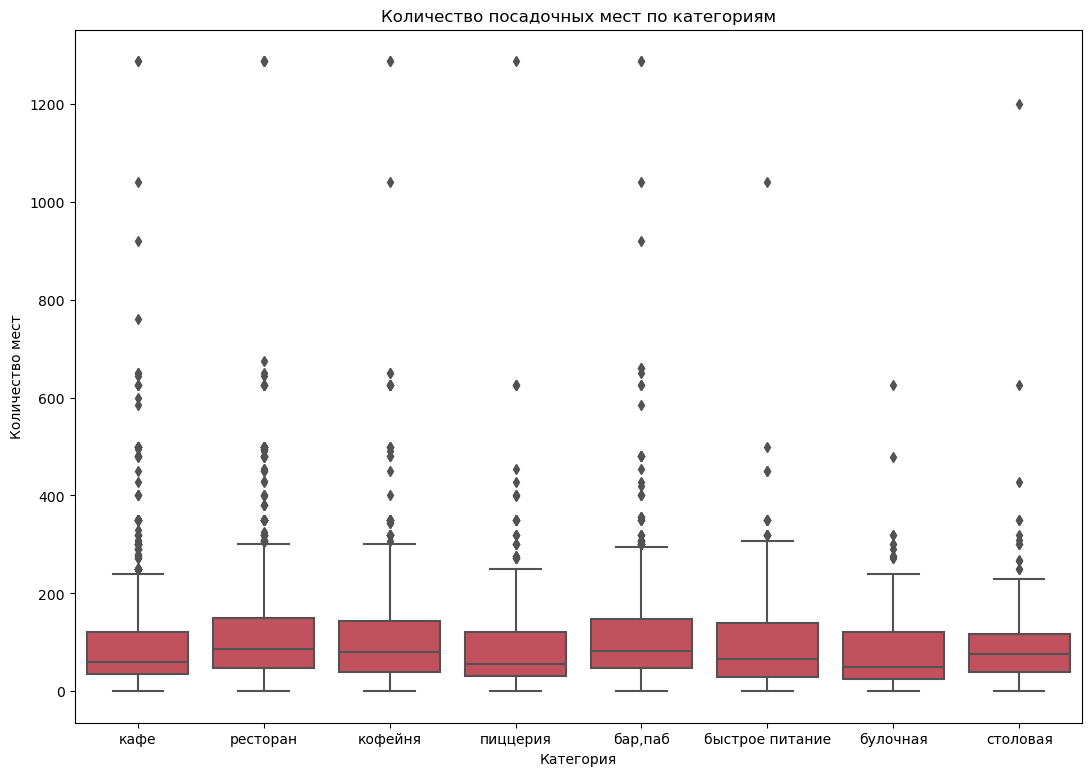

In [181]:
# строим боксплот
plt.rcParams['figure.figsize'] = [13, 9]
sns.boxplot(data=df, x='category', y='seats', color='#d53e4f')
plt.xlabel('Категория')
plt.ylabel('Количество мест') 
plt.title('Количество посадочных мест по категориям');

Мы видим много выбросов, зададим ограничение по оси y.

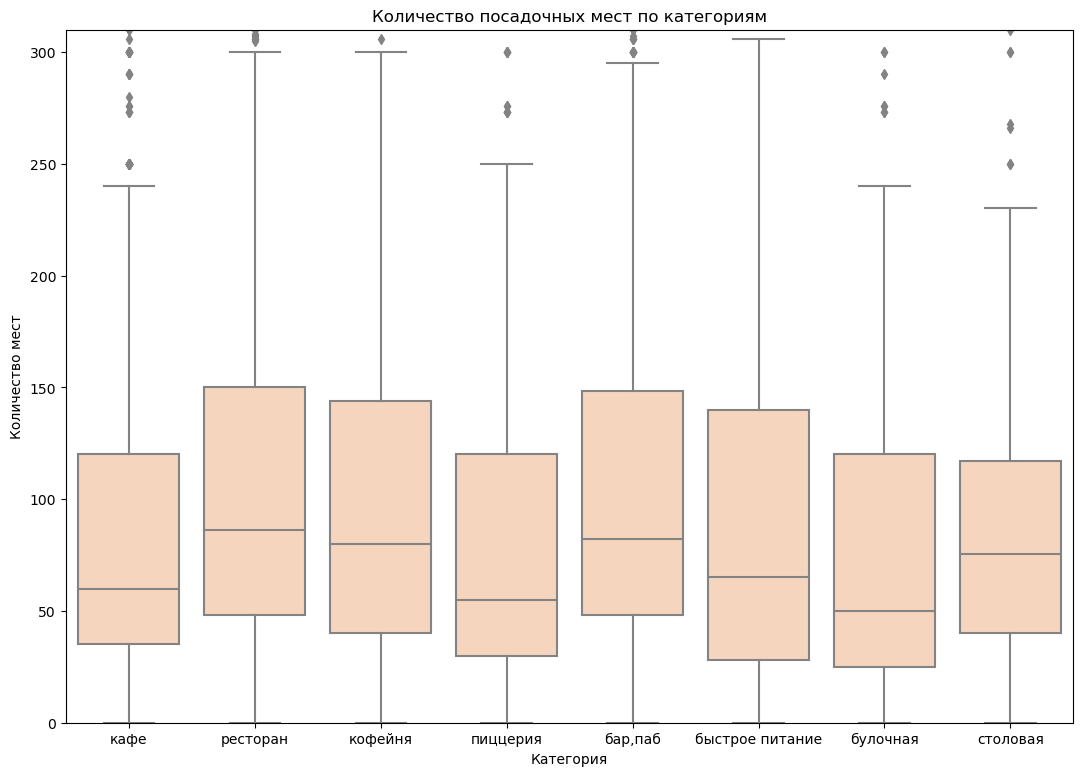

In [182]:
# строим боксплот с ограничением по оси y
plt.rcParams['figure.figsize'] = [13, 9]
sns.boxplot(data=df, x='category', y='seats', color='#FFD3B5')
plt.xlabel('Категория')
plt.ylabel('Количество мест') 
plt.ylim(0, 310)
plt.title('Количество посадочных мест по категориям');

Выбросы начинаются от 300 мест для категорий "ресторан", "кофейня", "бар,паб" и "быстрое питание", для остальных - от 250. Посмотрим, как изменится среднее количество мест, если убрать аномалии.

In [183]:
new_seats = df.query('seats < 300 and seats !=0')
new_seats_table = new_seats.pivot_table(index=['category'], values=['seats'],
                               aggfunc=['count', 'mean', 'median', 'min', 'max']).reset_index()
new_seats_table.columns = ['category', 'new_amount', 'new_mean', 'new_median', 'new_min', 'new_max']
round(new_seats_table)

,category,new_amount,new_mean,new_median,new_min,new_max
0,"бар,паб",419,90.0,78.0,6.0,295.0
1,булочная,131,83.0,50.0,3.0,290.0
2,быстрое питание,311,87.0,65.0,1.0,295.0
3,кафе,1106,79.0,60.0,1.0,290.0
4,кофейня,674,89.0,71.0,2.0,295.0
5,пиццерия,396,79.0,50.0,1.0,276.0
6,ресторан,1156,98.0,80.0,2.0,295.0
7,столовая,150,81.0,74.0,4.0,268.0


In [184]:
# объединим таблицы с местами 
new = seats_amt.merge(new_seats_table)
new['mean_change']=new['mean']-new['new_mean'] # разница в среднем количестве мест после избавления от аномалий
new['median_change']=new['median']-new['new_median'] # разница в медианном количестве мест после избавления от аномалий
new=new.sort_values(by='amount', ascending=False)
new

,category,amount,mean,median,min,max,new_amount,new_mean,new_median,new_min,new_max,mean_change,median_change
6,ресторан,1269,121.892041,86.0,0.0,1288.0,1156,98.236159,80.0,2.0,295.0,23.655882,6.0
3,кафе,1217,97.365653,60.0,0.0,1288.0,1106,79.087703,60.0,1.0,290.0,18.277950,0.0
4,кофейня,751,111.199734,80.0,0.0,1288.0,674,88.793769,71.0,2.0,295.0,22.405965,9.0
0,"бар,паб",467,124.477516,82.0,0.0,1288.0,419,89.675418,78.0,6.0,295.0,34.802098,4.0
5,пиццерия,427,94.496487,55.0,0.0,1288.0,396,78.777778,50.0,1.0,276.0,15.718709,5.0
2,быстрое питание,349,98.891117,65.0,0.0,1040.0,311,86.549839,65.0,1.0,295.0,12.341278,0.0
7,столовая,164,99.750000,75.5,0.0,1200.0,150,81.173333,73.5,4.0,268.0,18.576667,2.0
1,булочная,148,89.385135,50.0,0.0,625.0,131,83.099237,50.0,3.0,290.0,6.285898,0.0


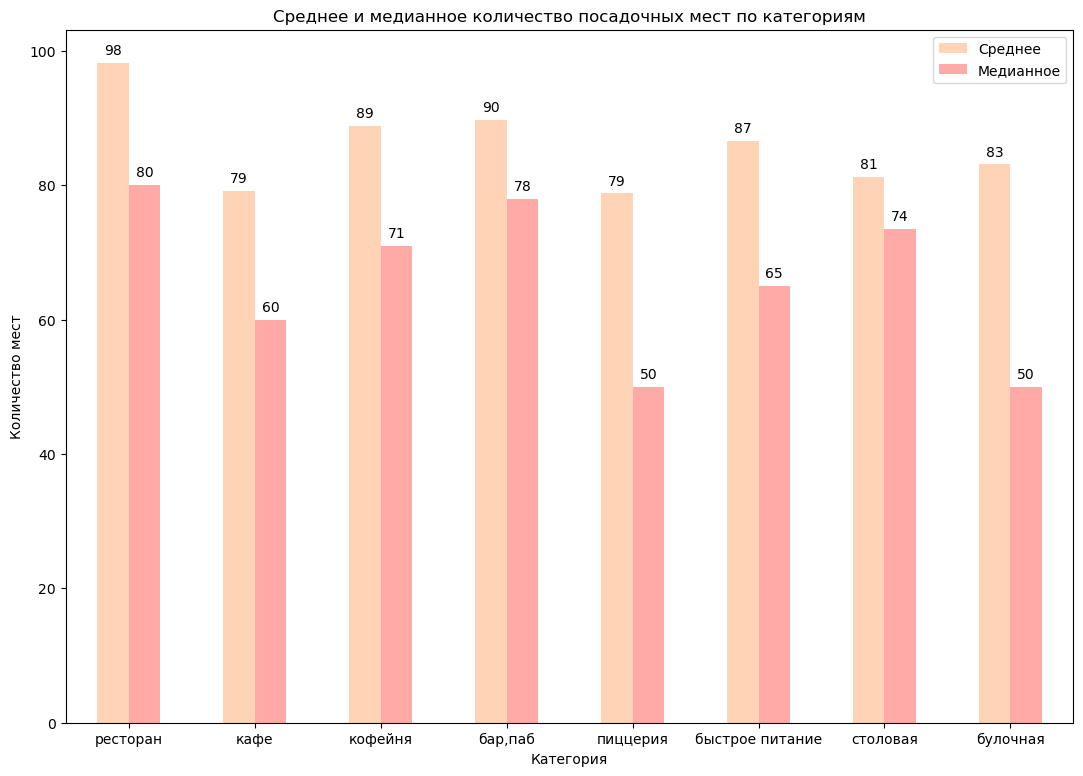

In [185]:
# посмотрим на среднее и медианное количество мест по категориям 
plt.rcParams['figure.figsize'] = [13, 9]
splot_seats_median = new.plot(kind='bar', x='category', y=['new_mean', 'new_median'], color=['#FFD3B5', '#FFAAA6'])
#добавляем подписи(проценты) на столбцах
for p in splot_seats_median.patches:
    splot_seats_median.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.legend(['Среднее', 'Медианное'])    
plt.xlabel('Категория')
plt.ylabel('Количество мест') 
plt.title('Среднее и медианное количество посадочных мест по категориям')
plt.xticks(rotation=0);

Среднее и медианное количество мест довольно сильно отличаются друг от друга. Скорее всего, средние значения значительно выше из-за крупных заведений (возможно, сетевых). Посмотрим на медианные значения: больше всего посадочных мест в ресторанах, барах/пабах, столовых и кафе. Меньше всего - в пиццериях и булочных.

### Сетевые заведения

In [186]:
# соотношение сетевых и несетевых заведений в датасете
df.groupby(['chain']).agg({'name':'count'})

,name
chain,
0,5199
1,3203


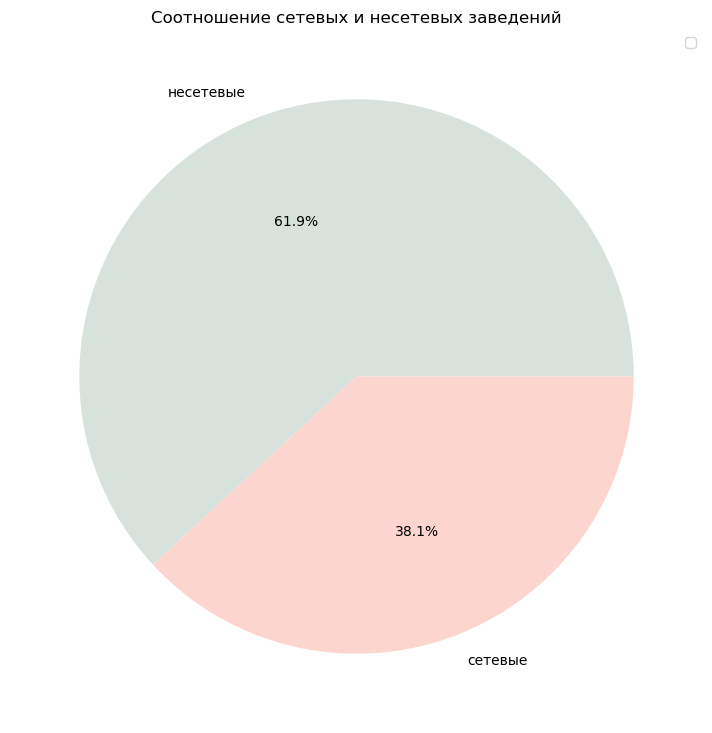

In [187]:
plt.rcParams['figure.figsize'] = [13, 9]
df.groupby(['chain']).agg({'name':'count'}).plot(kind='pie', subplots=True, autopct='%1.1f%%', labels=['несетевые', 'сетевые'], colors=['#d8e2dc', '#fcd5ce'])
plt.legend('')
plt.title('Соотношение сетевых и несетевых заведений')
plt.xlabel('')
plt.ylabel('');

Большая часть заведений не является сетевыми (61,9%), сетевые заведения составляют 38,1% датасета.

In [188]:
# какие категории заведений чаще являются сетевыми
chain_cat = df.groupby(['category', 'chain']).agg({'name':'count'})
chain_cat

name
category        chain      
бар,паб         0       596
                1       168
булочная        0        99
                1       157
быстрое питание 0       371
                1       232
кафе            0      1597
                1       779
кофейня         0       693
                1       720
пиццерия        0       303
                1       330
ресторан        0      1313
                1       729
столовая        0       227
                1        88

In [189]:
# делаем видоизмененную таблицу для графика
chain_plot = df.groupby(['chain', 'category']).agg({'name':'count'}).reset_index() 

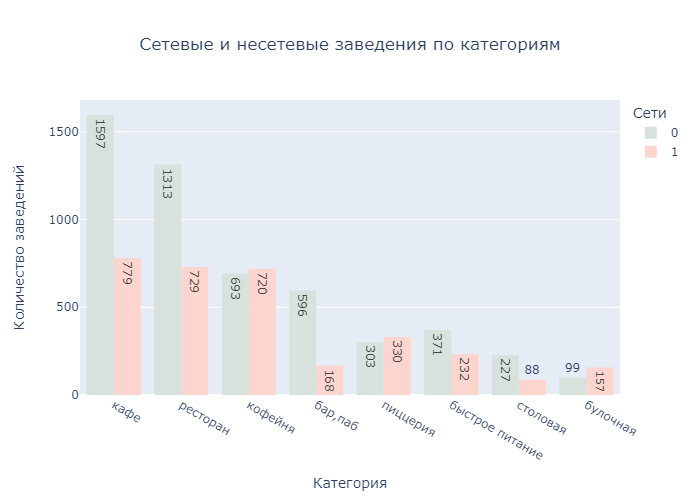

In [190]:
# визуализируем
try:
    fig = px.histogram(chain_plot, x='category', y='name', color='chain', barmode='group', 
                   text_auto=True, 
                   color_discrete_map = {0:'#d8e2dc',1:'#fcd5ce'},
                   title='Сетевые и несетевые заведения по категориям').update_xaxes(categoryorder='total descending')

    fig.update_layout(xaxis_title='Категория', yaxis_title='Количество заведений')
    fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
    fig.update_layout(legend=dict(title='Сети')) #меняем заголовок легенды
    fig.show(renderer='png')
    
except:
    fig = px.histogram(chain_plot, x='category', y='name', color='chain', barmode='group', 
                   color_discrete_map = {0:'#d8e2dc',1:'#fcd5ce'},
                   title='Сетевые и несетевые заведения по категориям').update_xaxes(categoryorder='total descending')

    fig.update_layout(xaxis_title='Категория', yaxis_title='Количество заведений')
    fig.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
    fig.update_layout(legend=dict(title='Сети')) #меняем заголовок легенды
    fig.show(renderer='png')

Чаще всего сетевыми являются кафе, рестораны и кофейни, реже всего - столовые. Интересно, что кофеен, пиццерий и булочных сетевых больше, чем несетевых.

### Топ-15 популярных сетей

In [191]:
# топ-15 популярных сетей в Москве
df_chains=df.query('chain==1')
top_chains = df_chains.groupby(['name', 'category']).agg({'name':'count'})
top_chains.columns=['amount']
top_chains=top_chains.reset_index()
top_chains = top_chains.sort_values(by='amount', ascending=False)
top_chains=top_chains.head(15)
top_chains

,name,category,amount
1126,шоколадница,кофейня,119
496,домино'с пицца,пиццерия,76
489,додо пицца,пиццерия,74
205,one price coffee,кофейня,71
1142,яндекс лавка,ресторан,69
72,cofix,кофейня,65
241,prime,ресторан,49
617,кофепорт,кофейня,42
632,кулинарная лавка братьев караваевых,кафе,39
963,теремок,ресторан,36


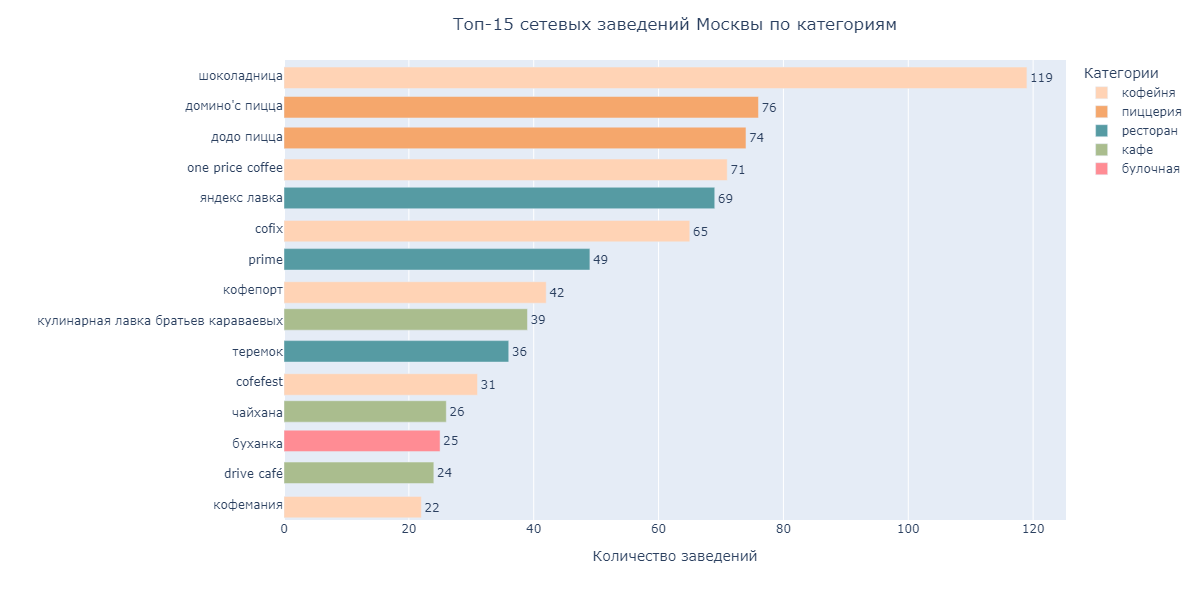

In [192]:
# визуализируем
try: 
    fig_two = px.bar(top_chains, x='amount', y='name', color='category', barmode='group', 
                 color_discrete_map = {'ресторан':'#569BA3',
                                         'кафе':'#aabd8e',
                                         'кофейня':'#FFD3B5',
                                         'бар,паб':'#FFAAA6',
                                         'булочная':'#FF8C94',
                                         'быстрое питание':'#fec601',
                                         'пиццерия':'#f5a76c',
                                         'столовая':'#73bfb8'},
                 text_auto=True)

    fig_two.update_yaxes(categoryorder='total ascending') #сортировка по оси у
    fig_two.update_layout(xaxis_title='Количество заведений', yaxis_title='') #заголовки осей
    fig_two.update_traces(width=0.7) #регулируем ширину столбцов
    fig_two.update_layout(bargap=0.8) #регулируем расстояние между столбцами
    fig_two.update_traces(textfont_size=12, textangle=0, textposition='outside', cliponaxis=False) #подписи на столбцах
    fig_two.update_layout(title='Топ-15 сетевых заведений Москвы по категориям', title_xref="paper", title_x=0.5) #положение заголовка
    fig_two.update_layout(legend=dict(title='Категории')) #меняем заголовок легенды
    fig_two.show(renderer='png', height=600, width=1200)
    
except:
    fig_two = px.bar(top_chains, x='amount', y='name', color='category', barmode='group', 
                 color_discrete_map = {'ресторан':'#569BA3',
                                         'кафе':'#aabd8e',
                                         'кофейня':'#FFD3B5',
                                         'бар,паб':'#FFAAA6',
                                         'булочная':'#FF8C94',
                                         'быстрое питание':'#fec601',
                                         'пиццерия':'#f5a76c',
                                         'столовая':'#73bfb8'})

    fig_two.update_yaxes(categoryorder='total ascending') #сортировка по оси у
    fig_two.update_layout(xaxis_title='Количество заведений', yaxis_title='') #заголовки осей
    fig_two.update_traces(width=0.7) #регулируем ширину столбцов
    fig_two.update_layout(bargap=0.8) #регулируем расстояние между столбцами
    fig_two.update_traces(textfont_size=12, textangle=0, textposition='outside', cliponaxis=False) #подписи на столбцах
    fig_two.update_layout(title='Топ-15 сетевых заведений Москвы по категориям', title_xref="paper", title_x=0.5) #положение заголовка
    fig_two.update_layout(legend=dict(title='Категории')) #меняем заголовок легенды
    fig_two.show(renderer='png', height=600, width=1200)
    

В топ сетей попали 6 кофеен, при этом "Шоколадница" - самая большая сеть среди всех категорий. На втором и третьем месте по количеству заведений 2 пиццерии - "Домино'с" и "Додо". В список вошли 3 сети ресторанов ("Яндекс Лавка", "Prime" и "Теремок") и 3 сети кафе ("Кулинарная лавка братьев Караваевых",  "Drive Café" и "Чайхана"), а также одна сеть булочных ("Буханка").

### Заведения по районам

In [193]:
# Какие административные районы Москвы присутствуют в датасете
print(df['district'].unique())

['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']


In [194]:
# количество заведений по районам
districts_total = df.groupby(['district']).agg({'name':'count'}).reset_index()
districts_total.columns=['district', 'total']
districts_total.sort_values(by='total', ascending=False)

,district,total
5,Центральный административный округ,2242
2,Северный административный округ,898
8,Южный административный округ,892
3,Северо-Восточный административный округ,890
1,Западный административный округ,850
0,Восточный административный округ,798
6,Юго-Восточный административный округ,714
7,Юго-Западный административный округ,709
4,Северо-Западный административный округ,409


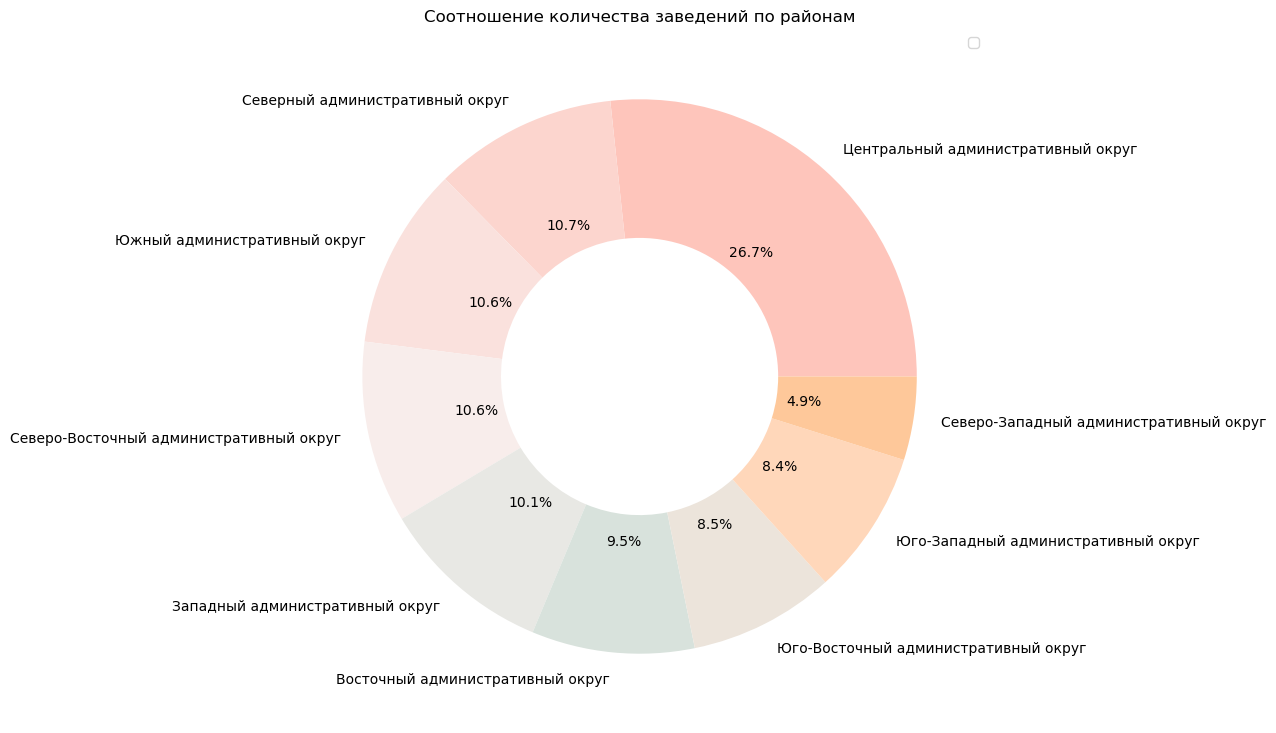

In [195]:
plt.rcParams['figure.figsize'] = [13, 9] #корректируем размер графика
df.groupby(['district']).agg({'name':'count'}).sort_values(by='name', ascending=False).plot(kind='pie', subplots=True, wedgeprops=dict(width=0.5), autopct='%1.1f%%',
                                                                                           colors=['#fec5bb', '#fcd5ce','#fae1dd','#f8edeb','#e8e8e4','#d8e2dc','#ece4db','#ffd7ba', '#fec89a'])

plt.legend('')
plt.title('Соотношение количества заведений по районам')
plt.xlabel('')
plt.ylabel('');

In [196]:
# количество заведений по категориям и районам
district = df.pivot_table (index = 'district', columns = 'category', values = 'name', aggfunc = 'count').reset_index()
district = district.merge(districts_total, on='district') # добавляем столбец с общим количеством заведений
district.sort_values(by='total', ascending=False)

,district,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая,total
5,Центральный административный округ,364,50,87,464,428,113,670,66,2242
2,Северный административный округ,68,39,58,234,193,77,188,41,898
8,Южный административный округ,68,25,85,264,131,73,202,44,892
3,Северо-Восточный административный округ,62,28,82,269,159,68,182,40,890
1,Западный административный округ,50,37,62,238,150,71,218,24,850
0,Восточный административный округ,53,25,71,272,105,72,160,40,798
6,Юго-Восточный административный округ,38,13,67,282,89,55,145,25,714
7,Юго-Западный административный округ,38,27,61,238,96,64,168,17,709
4,Северо-Западный административный округ,23,12,30,115,62,40,109,18,409


In [197]:
# альтернативная таблица для графика
districts_plot = df.groupby(['category','district']).agg({'name':'count'}).reset_index()
districts_plot.columns=['category', 'district', 'amount']
#districts_plot

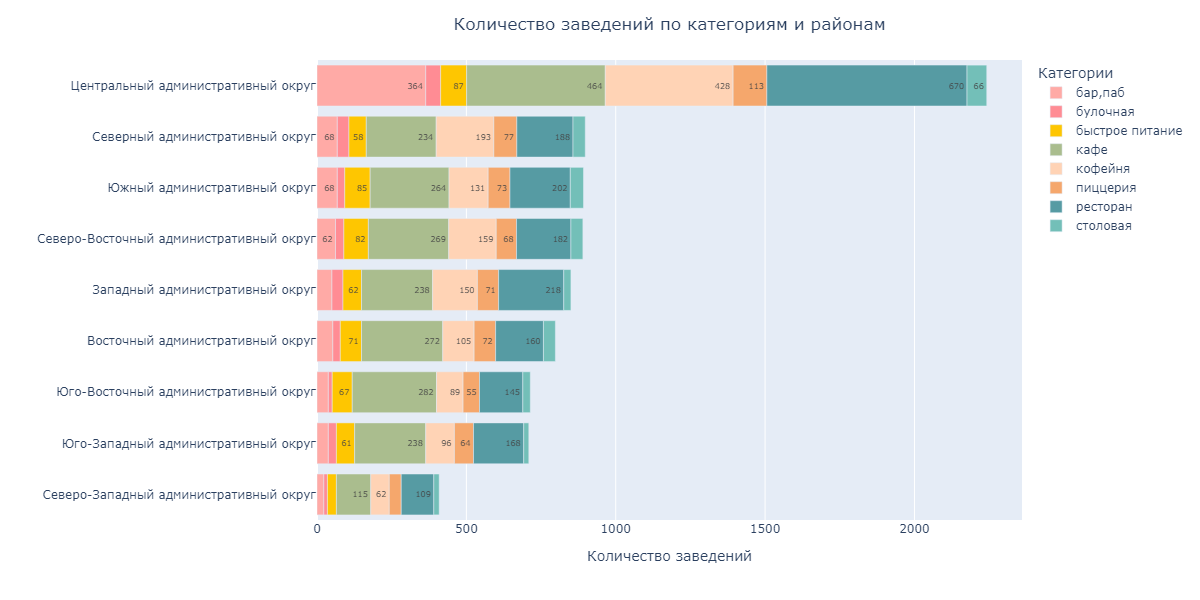

In [198]:
# визуализируем
try:
    fig_three = px.bar(districts_plot, y='district', x='amount', 
                   color='category', 
                   color_discrete_map = {'ресторан':'#569BA3',
                                         'кафе':'#aabd8e',
                                         'кофейня':'#FFD3B5',
                                         'бар,паб':'#FFAAA6',
                                         'булочная':'#FF8C94',
                                         'быстрое питание':'#fec601',
                                         'пиццерия':'#f5a76c',
                                         'столовая':'#73bfb8'},
                 text_auto=True)
   
    fig_three.update_yaxes(categoryorder='total ascending') #сортировка по оси у
    fig_three.update_layout(xaxis_title='Количество заведений', yaxis_title='') #заголовки осей
    fig_three.update_traces(textfont_size=8, textangle=0, textposition='inside', cliponaxis=True) #подписи на столбцах
    fig_three.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') #минимальный размер подписей на столбцах
    fig_three.update_layout(title='Количество заведений по категориям и районам', title_xref="paper", title_x=0.5) #положение заголовка
    fig_three.update_layout(legend=dict(title='Категории')) #меняем заголовок легенды
    fig_three.show(renderer='png', height=600, width=1200)
    
except:   
    fig_three = px.bar(districts_plot, y='district', x='amount', 
                   color='category', 
                   color_discrete_map = {'ресторан':'#569BA3',
                                         'кафе':'#aabd8e',
                                         'кофейня':'#FFD3B5',
                                         'бар,паб':'#FFAAA6',
                                         'булочная':'#FF8C94',
                                         'быстрое питание':'#fec601',
                                         'пиццерия':'#f5a76c',
                                         'столовая':'#73bfb8'})
   
    fig_three.update_yaxes(categoryorder='total ascending') #сортировка по оси у
    fig_three.update_layout(xaxis_title='Количество заведений', yaxis_title='') #заголовки осей
    fig_three.update_traces(textfont_size=8, textangle=0, textposition='inside', cliponaxis=True) #подписи на столбцах
    fig_three.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') #минимальный размер подписей на столбцах
    fig_three.update_layout(title='Количество заведений по категориям и районам', title_xref="paper", title_x=0.5) #положение заголовка
    fig_three.update_layout(legend=dict(title='Категории')) #меняем заголовок легенды
    fig_three.show(renderer='png', height=600, width=1200)

Больше всего заведений (2242 штук) находится в Центральном административном округе. Почти треть из них составляют рестораны (670), также много кафе (464), кофеен (428) и баров/пабов (364). Во всех остальных районах самая популярная категория - это кафе, а рестораны на втором месте (кроме Северного административного округа, там их опережают кофейни: 193 против 188 ресторанов). На третьем месте по количеству заведений почти во всех районах находятся кофейни. Меньше всего заведений в целом в Северо-Западном округе: всего 409.

 ### Средние рейтинги заведений

In [199]:
# средние рейтинги по категориям
ratings = df.groupby(['category']).agg({'rating':'mean'}).round(2).sort_values('rating', ascending=False)
ratings

,rating
category,
"бар,паб",4.39
пиццерия,4.30
ресторан,4.29
кофейня,4.28
булочная,4.27
столовая,4.21
кафе,4.12
быстрое питание,4.05


Средние рейтинги по категориям различаются незначительно: самый высокий средний рейтинг у баров/пабов (4,39), а самый низкий - у быстрого питания (4,05).

In [200]:
# средний рейтинг заведений каждого района
district_ratings = df.groupby(['district']).agg({'rating':'mean'}).round(2).sort_values('rating', ascending=False).reset_index()
district_ratings.columns=['district', 'rating']
district_ratings

,district,rating
0,Центральный административный округ,4.38
1,Северный административный округ,4.24
2,Северо-Западный административный округ,4.21
3,Западный административный округ,4.18
4,Южный административный округ,4.18
5,Восточный административный округ,4.17
6,Юго-Западный административный округ,4.17
7,Северо-Восточный административный округ,4.15
8,Юго-Восточный административный округ,4.10


In [229]:
# читаем файл и сохраняем в переменной
#with open('admin_level_geomap.geojson', 'r') as f:
 #   geo_json = json.load(f)

#json.dumps(geo_json, indent=2, ensure_ascii=False, sort_keys=True)

In [231]:
# загружаем JSON-файл с границами округов Москвы
state_geo = 'admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=district_ratings,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='GnBu',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# выводим карту
#m

### Все заведения на карте

In [232]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
df.apply(create_clusters, axis=1)

# выводим карту
#m

0       None
1       None
2       None
3       None
4       None
        ... 
8401    None
8402    None
8403    None
8404    None
8405    None
Length: 8402, dtype: object

### Топ-15 улиц по количеству заведений

In [204]:
# по общему количеству заведений
top_streets = df.groupby(['street']).agg({'name':'count'}).sort_values('name', ascending=False).reset_index().head(15)
top_streets.columns=['street','total']
top_streets

,street,total
0,проспект мира,183
1,профсоюзная улица,122
2,проспект вернадского,108
3,ленинский проспект,107
4,ленинградский проспект,95
5,дмитровское шоссе,88
6,каширское шоссе,77
7,варшавское шоссе,76
8,ленинградское шоссе,70
9,мкад,65


In [205]:
# по категориям
streets_15 = df.pivot_table(index = 'street', columns = 'category', values = 'name', aggfunc = 'count')
# добавляем столбец total с общим количеством заведений
streets_15['total'] = streets_15[['бар,паб','булочная','быстрое питание', 'кафе', 'кофейня', 'пиццерия', 'ресторан', 'столовая']].sum(axis = 1)
streets_15 = streets_15.sort_values(by='total', ascending=False).head(15)
streets_15

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая,total
street,,,,,,,,,
проспект мира,11.0,4.0,21.0,53.0,36.0,11.0,45.0,2.0,183.0
профсоюзная улица,6.0,4.0,15.0,35.0,18.0,15.0,26.0,3.0,122.0
проспект вернадского,7.0,1.0,12.0,25.0,16.0,12.0,33.0,2.0,108.0
ленинский проспект,10.0,3.0,2.0,26.0,23.0,5.0,33.0,5.0,107.0
ленинградский проспект,15.0,4.0,2.0,12.0,25.0,9.0,25.0,3.0,95.0
дмитровское шоссе,6.0,2.0,10.0,23.0,11.0,8.0,24.0,4.0,88.0
каширское шоссе,2.0,NaN,10.0,20.0,16.0,5.0,19.0,5.0,77.0
варшавское шоссе,6.0,NaN,7.0,18.0,14.0,4.0,20.0,7.0,76.0
ленинградское шоссе,5.0,2.0,5.0,13.0,13.0,3.0,26.0,3.0,70.0


In [206]:
# альтернативная таблица для графика
top_streets_category=df.groupby(['street', 'category']).agg({'name':'count'}).reset_index().sort_values('name', ascending=False)
top_streets_plot = top_streets_category[top_streets_category['street'].isin(top_streets['street'])]
#top_streets_plot

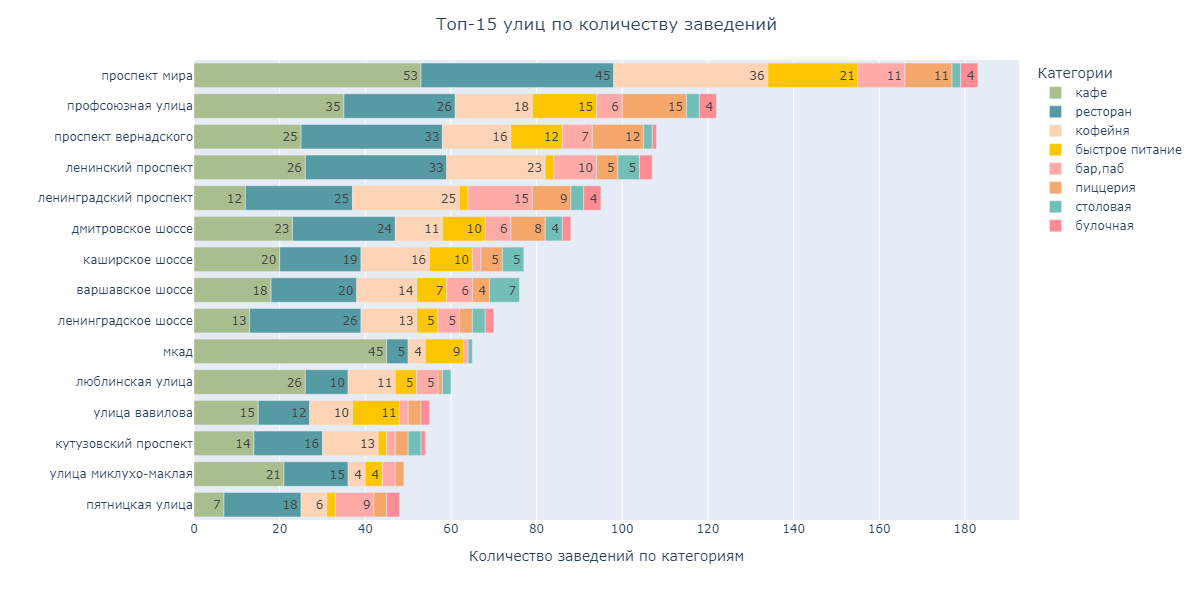

In [207]:
# визуализируем
try:
    fig_four = px.bar(top_streets_plot, y='street', x='name', 
                   color='category',
                   color_discrete_map = {'ресторан':'#569BA3',
                                         'кафе':'#aabd8e',
                                         'кофейня':'#FFD3B5',
                                         'бар,паб':'#FFAAA6',
                                         'булочная':'#FF8C94',
                                         'быстрое питание':'#fec601',
                                         'пиццерия':'#f5a76c',
                                         'столовая':'#73bfb8'},
                   text_auto=True)
    fig_four.update_yaxes(categoryorder='total ascending') #сортировка по оси у
    fig_four.update_layout(xaxis_title='Количество заведений по категориям', yaxis_title='') #заголовки осей
    fig_four.update_traces(textfont_size=8, textangle=0, textposition='inside', cliponaxis=True) #подписи на столбцах
    fig_four.update_layout(uniformtext_minsize=12, uniformtext_mode='hide') #минимальный размер подписей на столбцах
    fig_four.update_layout(title='Топ-15 улиц по количеству заведений', title_xref="paper", title_x=0.5) #положение заголовка
    fig_four.update_layout(legend=dict(title='Категории')) #меняем заголовок легенды
    fig_four.show(renderer='png', height=600, width=1200)
    
except:    
    fig_four = px.bar(top_streets_plot, y='street', x='name', 
                   color='category',
                   color_discrete_map = {'ресторан':'#569BA3',
                                         'кафе':'#aabd8e',
                                         'кофейня':'#FFD3B5',
                                         'бар,паб':'#FFAAA6',
                                         'булочная':'#FF8C94',
                                         'быстрое питание':'#fec601',
                                         'пиццерия':'#f5a76c',
                                         'столовая':'#73bfb8'})
    fig_four.update_yaxes(categoryorder='total ascending') #сортировка по оси у
    fig_four.update_layout(xaxis_title='Количество заведений по категориям', yaxis_title='') #заголовки осей
    fig_four.update_traces(textfont_size=8, textangle=0, textposition='inside', cliponaxis=True) #подписи на столбцах
    fig_four.update_layout(uniformtext_minsize=12, uniformtext_mode='hide') #минимальный размер подписей на столбцах
    fig_four.update_layout(title='Топ-15 улиц по количеству заведений', title_xref="paper", title_x=0.5) #положение заголовка
    fig_four.update_layout(legend=dict(title='Категории')) #меняем заголовок легенды
    fig_four.show(renderer='png', height=600, width=1200)
    

Больше всего заведений (183) находятся на проспекте Мира, причем во всех категориях, кроме пиццерий и столовых. Кафе и рестораны - самые популярные категории для большинства улиц. По количеству кафе на втором месте после проспекта Мира находится МКАД - скорее всего, это придорожные кафе или закусочные при заправках. На третьем месте по популярности находятся кофейни: их больше всего на проспекте Мира, Ленинградском и Ленинском проспектах.

In [208]:
# улицы, на которых находится только один объект общепита
singles = df.groupby(['street']).agg({'name':'count'}).sort_values('name', ascending=True).reset_index()
singles.columns = ['street','total']
singles = singles.query('total == 1')
print('Количество улиц с одним объектом общепита:', len(singles))

Количество улиц с одним объектом общепита: 457


In [209]:
# категории этих заведений
singles_category = top_streets_category[top_streets_category['street'].isin(singles['street'])]
singles_category = singles_category.groupby('category')['street'].count().sort_values(ascending=False)
singles_category

category
кафе               159
ресторан            93
кофейня             84
бар,паб             39
столовая            36
быстрое питание     23
пиццерия            15
булочная             8
Name: street, dtype: int64

На 457 улицах находятся по одному заведению. Чаще всего это кафе (159), реже всего - булочная (8).

### Средние чеки заведений 

In [210]:
# медиана средних чеков по районам
median_avg_bill = df.groupby(['district']).agg({'middle_avg_bill':'median'}).sort_values('middle_avg_bill', ascending=False).reset_index()
median_avg_bill.columns=['district', 'median_bill']
median_avg_bill

,district,median_bill
0,Западный административный округ,1000.0
1,Центральный административный округ,1000.0
2,Северо-Западный административный округ,700.0
3,Северный административный округ,650.0
4,Юго-Западный административный округ,600.0
5,Восточный административный округ,575.0
6,Северо-Восточный административный округ,500.0
7,Южный административный округ,500.0
8,Юго-Восточный административный округ,450.0


In [211]:
# хороплет с ценами

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=median_avg_bill,
    columns=['district', 'median_bill'],
    key_on='feature.name',
    fill_color='PuBu',
    fill_opacity=0.8,
    legend_name='Медианный средний чек по районам',
).add_to(m)

# выводим карту
#m

Два округа с самыми высокими медианными чеками - Центральный и Западный. Самые низкие цены в Юго-Восточном округе: разница с Центральным больше, чем в 2 раза.

### Выводы

- В Москве из заведений общественного питания преобладают кафе (всего 2376 штук) и рестораны (2042), на третьем месте оказались кофейни (1413). Менее всего популярны булочные (256) и столовые (315).
- Количество посадочных мест отличается в зависимости от категории: больше всего мест в ресторанах, барах/пабах, столовых и кафе. Меньше всего - в пиццериях и булочных.
- Сетевые заведения составляют 38,1% от всех объектов. В категориях "кофейня", "пиццерия" и "булочная" сетевых заведений больше, чем несетевых. Из топ-15 сетевых заведений семь являются кофейнями, два - пиццериями.
- Больше всего заведений находится в ЦАО, из них почти треть составляют рестораны. Почти во всех административных округах кафе на первом месте по количеству заведений, на втором - рестораны, на третьем - кофейни.
- Средние рейтинги заведений по категориям не сильно различаются: от 4,05 в категории "быстрое питание" до 4,39 в категории "бары/пабы".
- Самый высокий медианный чек составил 1000 р. в ЦАО и ЗАО, а самый низкий - 450 р. в ЮВАО.

## Открытие кофейни

In [212]:
# сколько всего кофеен в датасете
coffeeshops = df.query('category=="кофейня" ')
print('Количество кофеен:', len(coffeeshops))

Количество кофеен: 1413


### Кофейни по районам

In [213]:
# кофейни по районам
coffeeshops_districts = coffeeshops.groupby(['district']).agg({'name':'count'}).sort_values(by='name', ascending=False)
coffeeshops_districts.columns=['total']
coffeeshops_districts

,total
district,
Центральный административный округ,428
Северный административный округ,193
Северо-Восточный административный округ,159
Западный административный округ,150
Южный административный округ,131
Восточный административный округ,105
Юго-Западный административный округ,96
Юго-Восточный административный округ,89
Северо-Западный административный округ,62


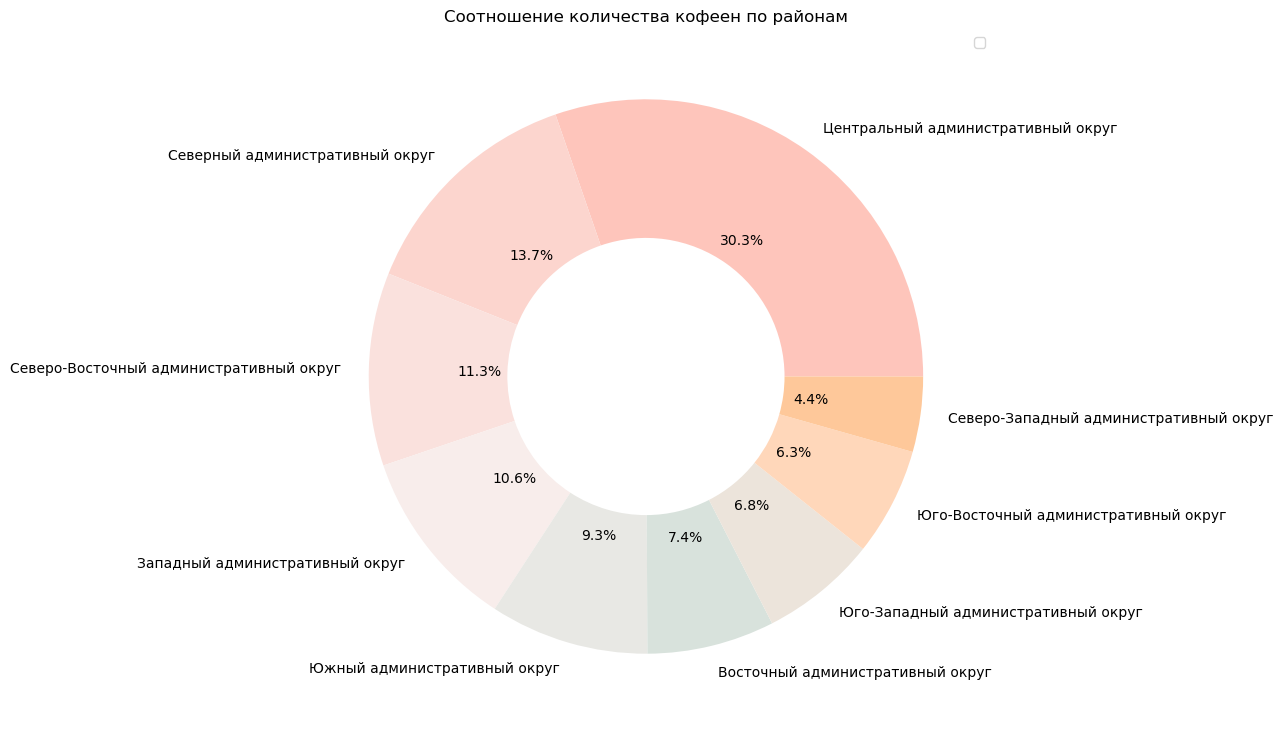

In [214]:
plt.rcParams['figure.figsize'] = [13, 9]
coffeeshops_districts.plot(kind='pie', subplots=True, wedgeprops=dict(width=0.5), autopct='%1.1f%%',
                          colors=['#fec5bb', '#fcd5ce','#fae1dd','#f8edeb','#e8e8e4','#d8e2dc','#ece4db','#ffd7ba', '#fec89a'])
plt.legend('')
plt.title('Соотношение количества кофеен по районам')
plt.xlabel('')
plt.ylabel('');

Почти треть (30,3%) всех кофеен находятся в Центральном округе, всего 428 штук. С большим отрывом следуют Северный (13,7%) и Северо-Восточный (11,3%) округа. Меньше всего кофеен в Северо-Западном округе: 4,4% от общего количества кофеен в Москве, или 62 штуки. 

### Круглосуточные кофейни

In [215]:
# круглосуточные кофейни
coffeeshops.groupby(['is_24/7']).agg({'name':'count'})

,name
is_24/7,
False,1339
True,59


In [216]:
coffeeshops_always_open = coffeeshops.query('hours == "ежедневно, круглосуточно"')
coffeeshops_always_open.groupby(['district']).agg({'name':'count'}).sort_values(by='name', ascending=False)

,name
district,
Центральный административный округ,26
Западный административный округ,9
Юго-Западный административный округ,7
Восточный административный округ,5
Северный административный округ,5
Северо-Восточный административный округ,3
Северо-Западный административный округ,2
Юго-Восточный административный округ,1
Южный административный округ,1


In [217]:
# сетевые и несетевые круглосуточные кофейни
coffeeshops_always_open.groupby(['chain','name']).agg({'address':'count'})

address
chain name                       
0     foodmoscowcoffee          1
      one and double            1
      one more, please          1
      гоголь-моголь             1
      кофе on                   1
      кофейня one&double        1
      лаванда кофе              1
      молоко                    1
      столица                   1
1     cinnabon                  1
      cofix                     2
      one price coffee          1
      one&double                1
      the wild bean cafe        1
      wild bean                 5
      wild bean cafe            6
      you&coffee                2
      кофе с собой              2
      кофе хауз                 3
      кофемания                 8
      пирог хауз                1
      шоколадница              17

Всего у нас 59 круглосуточных кофеен, из них 26 находятся в Центральном округе. В основном круглосуточные кофейни - сетевые, больше всего заведений "Шоколадница" (17) и "Кофемания" (8).

### Рейтинги кофеен

In [218]:
# рейтинги кофеен по районам
coffeeshops_ratings = coffeeshops.pivot_table(index=['district'], values=['rating'],
                               aggfunc= ['mean', 'median', 'min', 'max']).round(2).reset_index()
coffeeshops_ratings.columns = ['district',  'mean', 'median', 'min', 'max']
coffeeshops_ratings.sort_values(by='mean', ascending=False)

,district,mean,median,min,max
5,Центральный административный округ,4.34,4.3,2.3,5.0
4,Северо-Западный административный округ,4.33,4.3,2.0,5.0
2,Северный административный округ,4.29,4.3,2.0,5.0
0,Восточный административный округ,4.28,4.3,3.0,5.0
7,Юго-Западный административный округ,4.28,4.3,3.3,5.0
6,Юго-Восточный административный округ,4.23,4.3,2.3,5.0
8,Южный административный округ,4.23,4.3,2.0,5.0
3,Северо-Восточный административный округ,4.22,4.3,1.4,5.0
1,Западный административный округ,4.20,4.2,2.3,5.0


Средние и медианные рейтинги кофеен по районам не сильно различаются: самый высокий средний рейтинг в Центральном округе (4.34), самый низкий - в Западном (4.20). Интересны минимальные оценки: в Юго-Западном округе минимальный рейтинг 3.3,  а в Северо-Восточном - 1.4.

### Стоимость чашки капучино 

In [219]:
coffeeshops_cup = coffeeshops.pivot_table(index=['district'], values=['middle_coffee_cup'],
                               aggfunc= ['mean', 'median', 'min', 'max']).round(2).reset_index()
coffeeshops_cup.columns = ['district',  'mean', 'median', 'min', 'max']
coffeeshops_cup.sort_values(by='mean', ascending=False)

,district,mean,median,min,max
1,Западный административный округ,189.94,189.0,60.0,300.0
5,Центральный административный округ,187.52,190.0,60.0,328.0
7,Юго-Западный административный округ,184.18,198.0,95.0,291.0
0,Восточный административный округ,174.02,135.0,60.0,1568.0
2,Северный административный округ,165.79,159.0,60.0,325.0
4,Северо-Западный административный округ,165.52,165.0,60.0,270.0
3,Северо-Восточный административный округ,165.33,162.5,60.0,297.0
8,Южный административный округ,158.49,150.0,60.0,275.0
6,Юго-Восточный административный округ,151.09,147.5,60.0,375.0


In [220]:
coffeeshops.query('middle_coffee_cup == 1568')

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
2859,шоколадница,кофейня,"москва, большая семёновская улица, 27, корп. 1",Восточный административный округ,"ежедневно, 08:00–23:00",55.782268,37.709022,4.2,средние,Цена чашки капучино:230–2907 ₽,NaN,1568.0,1,48.0,большая семёновская улица,False


В данных явно ошибка: стоимость чашки капучино в одной из "Шоколадниц" составила 1568 рублей. Повторим запрос, убрав это значение.

In [221]:
# исправленная таблица
coffeeshops_cup = coffeeshops.query('middle_coffee_cup != 1568').pivot_table(index=['district'], values=['middle_coffee_cup'],
                               aggfunc= ['mean', 'median', 'min', 'max']).round(2).reset_index()
coffeeshops_cup.columns = ['district',  'mean', 'median', 'min', 'max']
coffeeshops_cup.sort_values(by='mean', ascending=False)

,district,mean,median,min,max
1,Западный административный округ,189.94,189.0,60.0,300.0
5,Центральный административный округ,187.52,190.0,60.0,328.0
7,Юго-Западный административный округ,184.18,198.0,95.0,291.0
2,Северный административный округ,165.79,159.0,60.0,325.0
4,Северо-Западный административный округ,165.52,165.0,60.0,270.0
3,Северо-Восточный административный округ,165.33,162.5,60.0,297.0
8,Южный административный округ,158.49,150.0,60.0,275.0
6,Юго-Восточный административный округ,151.09,147.5,60.0,375.0
0,Восточный административный округ,140.02,135.0,60.0,256.0


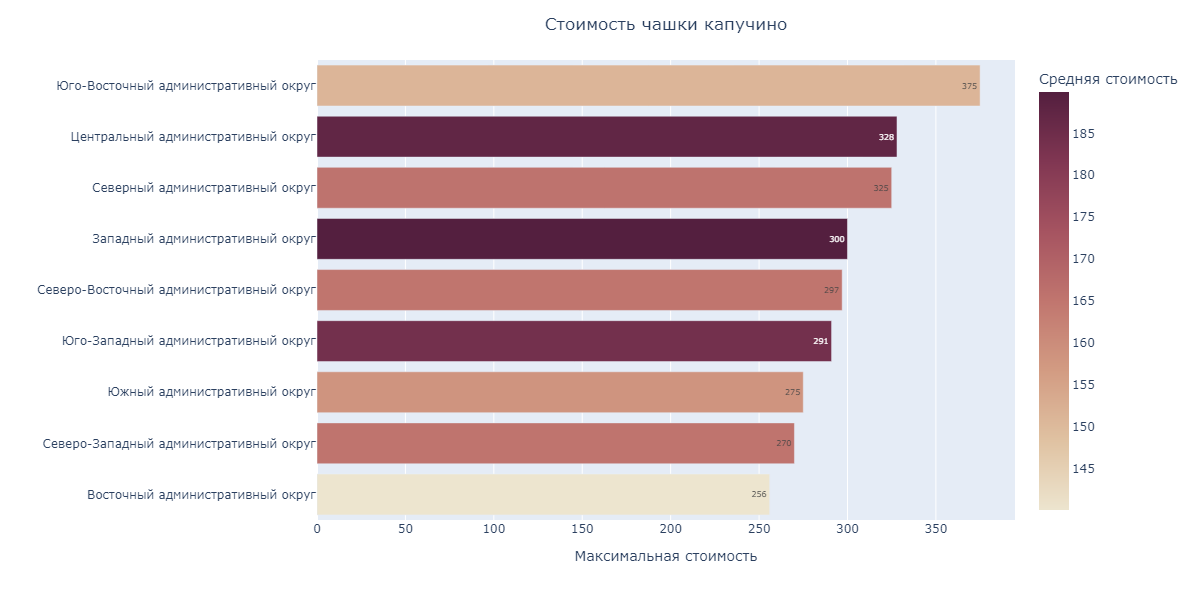

In [222]:
try:
    fig_five = px.bar(coffeeshops_cup, y='district', x='max', 
                   color='mean', 
                  color_continuous_scale='Brwnyl',
                 text_auto=True)

    fig_five.update_yaxes(categoryorder='total ascending') #сортировка по оси у
    fig_five.update_layout(xaxis_title='Максимальная стоимость', yaxis_title='') #заголовки осей
    fig_five.update_traces(textfont_size=8, textangle=0, textposition='inside', cliponaxis=True) #подписи на столбцах
    fig_five.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') #минимальный размер подписей на столбцах
    fig_five.update_layout(title='Стоимость чашки капучино ', title_xref="paper", title_x=0.5) #положение заголовка
    fig_five.update_layout(coloraxis_colorbar=dict(title="Средняя стоимость")) #меняем заголовок легенды
    fig_five.show(renderer='png', height=600, width=1200)
    
except:
    fig_five = px.bar(coffeeshops_cup, y='district', x='max', 
                   color='mean', 
                  color_continuous_scale='Brwnyl',)

    fig_five.update_yaxes(categoryorder='total ascending') #сортировка по оси у
    fig_five.update_layout(xaxis_title='Максимальная стоимость', yaxis_title='') #заголовки осей
    fig_five.update_traces(textfont_size=8, textangle=0, textposition='inside', cliponaxis=True) #подписи на столбцах
    fig_five.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') #минимальный размер подписей на столбцах
    fig_five.update_layout(title='Стоимость чашки капучино ', title_xref="paper", title_x=0.5) #положение заголовка
    fig_five.update_layout(coloraxis_colorbar=dict(title="Средняя стоимость")) #меняем заголовок легенды
    fig_five.show(renderer='png', height=600, width=1200)

In [223]:
# Средняя стоимость чашки капучино на карте

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=coffeeshops_cup,
    columns=['district', 'mean'],
    key_on='feature.name',
    fill_color='YlOrBr',
    fill_opacity=0.8,
    legend_name='Средняя стоимость чашки капучино',
).add_to(m)

# выводим карту
#m

Минимальная стоимость чашки капучино во всех районах, кроме Юго-Западного административного округа, составила 60 р. (в ЮЗАО - 95 р.). В среднем кофе обойдется дешевле всего в Восточном округе (средняя стоимость 140 р., а максимальная - 256 р.). Самая высокая средняя стоимость чашки в Западном округе (почти 190 р.). 

### Дополнительные факторы

In [224]:
# количество сетевых кофеен по районам
chain_coffeeshops = coffeeshops.groupby(['chain', 'district']).agg({'name':'count'}).reset_index() 
chain_coffeeshops

,chain,district,name
0,0,Восточный административный округ,54
1,0,Западный административный округ,57
2,0,Северный административный округ,96
3,0,Северо-Восточный административный округ,80
4,0,Северо-Западный административный округ,28
5,0,Центральный административный округ,207
6,0,Юго-Восточный административный округ,60
7,0,Юго-Западный административный округ,46
8,0,Южный административный округ,65
9,1,Восточный административный округ,51


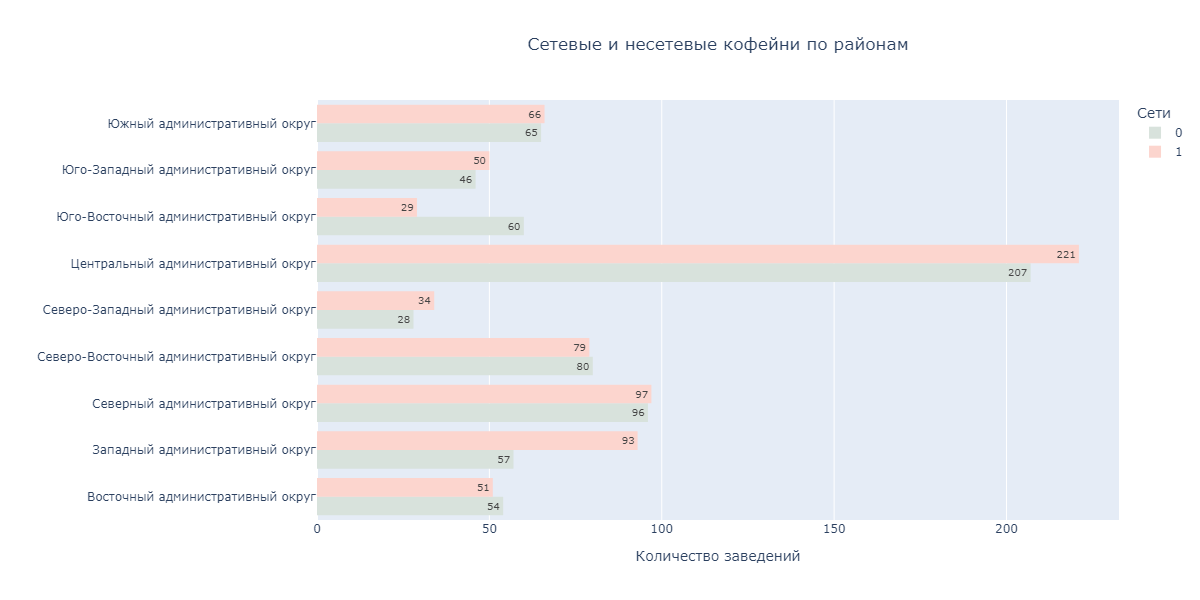

In [225]:
# визуализируем
try:
    chain_coffeeshops_plot = px.histogram(chain_coffeeshops, x='name', y='district', color='chain', barmode='group', 
                   text_auto=True, 
                   color_discrete_map = {0:'#d8e2dc',1:'#fcd5ce'},
                   title='Сетевые и несетевые кофейни по районам').update_xaxes(categoryorder='total descending')

    chain_coffeeshops_plot.update_layout(xaxis_title='Количество заведений', yaxis_title='')
    chain_coffeeshops_plot.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
    chain_coffeeshops_plot.update_layout(legend=dict(title='Сети')) #меняем заголовок легенды
    chain_coffeeshops_plot.show(renderer='png', height=600, width=1200)
    
except:
    chain_coffeeshops_plot = px.histogram(chain_coffeeshops, x='name', y='district', color='chain', barmode='group', 
                   color_discrete_map = {0:'#d8e2dc',1:'#fcd5ce'},
                   title='Сетевые и несетевые кофейни по районам').update_xaxes(categoryorder='total descending')

    chain_coffeeshops_plot.update_layout(xaxis_title='Количество заведений', yaxis_title='')
    chain_coffeeshops_plot.update_layout(title_xref="paper", title_x=0.5) #положение заголовка
    chain_coffeeshops_plot.update_layout(legend=dict(title='Сети')) #меняем заголовок легенды
    chain_coffeeshops_plot.show(renderer='png', height=600, width=1200)

В большинстве районов количество сетевых и несетевых кофеен не сильно различатся. Исключение составляют Юго-Восточный округ, где сетевых кофеен в два раза меньше, чем сетевых; и Западный округ, где, наоборот, сетевых значительно больше. 

In [226]:
# сделаем таблицу с количеством мест, средним чеком и средним счетом в кофейнях по районам
extras = coffeeshops.pivot_table(index=['district'], values=['middle_coffee_cup', 'middle_avg_bill', 'seats'],
                               aggfunc= ['mean']).round(0).reset_index()
extras.columns=['district', 'middle_avg_bill', 'middle_coffee_cup', 'seats']
extras

,district,middle_avg_bill,middle_coffee_cup,seats
0,Восточный административный округ,486.0,174.0,97.0
1,Западный административный округ,694.0,190.0,153.0
2,Северный административный округ,496.0,166.0,117.0
3,Северо-Восточный административный округ,433.0,165.0,92.0
4,Северо-Западный административный округ,441.0,166.0,87.0
5,Центральный административный округ,795.0,188.0,113.0
6,Юго-Восточный административный округ,263.0,151.0,71.0
7,Юго-Западный административный округ,382.0,184.0,87.0
8,Южный административный округ,505.0,158.0,125.0


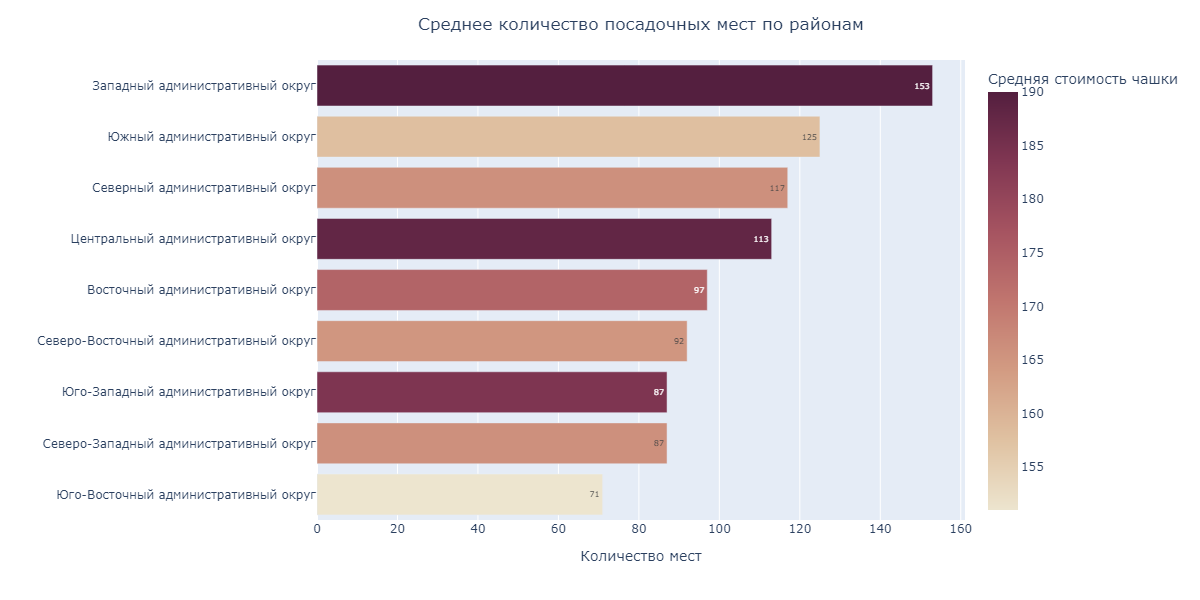

In [227]:
# среднее количество посадочных мест по районам и средняя стоимость чашки капучино в них
try: 
    fig_six = px.bar(extras, y='district', x='seats', 
                   color='middle_coffee_cup', 
                  color_continuous_scale='Brwnyl',
                 text_auto=True)

    fig_six.update_yaxes(categoryorder='total ascending') #сортировка по оси у
    fig_six.update_layout(xaxis_title='Количество мест', yaxis_title='') #заголовки осей
    fig_six.update_traces(textfont_size=8, textangle=0, textposition='inside', cliponaxis=True) #подписи на столбцах
    fig_six.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') #минимальный размер подписей на столбцах
    fig_six.update_layout(title='Среднее количество посадочных мест по районам', title_xref="paper", title_x=0.5) #положение заголовка
    fig_six.update_layout(coloraxis_colorbar=dict(title="Средняя стоимость чашки")) #меняем заголовок легенды
    fig_six.show(renderer='png', height=600, width=1200)
    
except:
    fig_six = px.bar(extras, y='district', x='seats', 
                   color='middle_coffee_cup', color_continuous_scale='Brwnyl')
    fig_six.update_yaxes(categoryorder='total ascending') #сортировка по оси у
    fig_six.update_layout(xaxis_title='Количество мест', yaxis_title='') #заголовки осей
    fig_six.update_traces(textfont_size=8, textangle=0, textposition='inside', cliponaxis=True) #подписи на столбцах
    fig_six.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') #минимальный размер подписей на столбцах
    fig_six.update_layout(title='Среднее количество посадочных мест по районам', title_xref="paper", title_x=0.5) #положение заголовка
    fig_six.update_layout(coloraxis_colorbar=dict(title="Средняя стоимость чашки")) #меняем заголовок легенды
    fig_six.show(renderer='png', height=600, width=1200)

Самые вместительные кофейни находятся в Западном округе: в них в среднем 153 места, самые маленькие - в Юго-Восточном: в среднем 71 место.

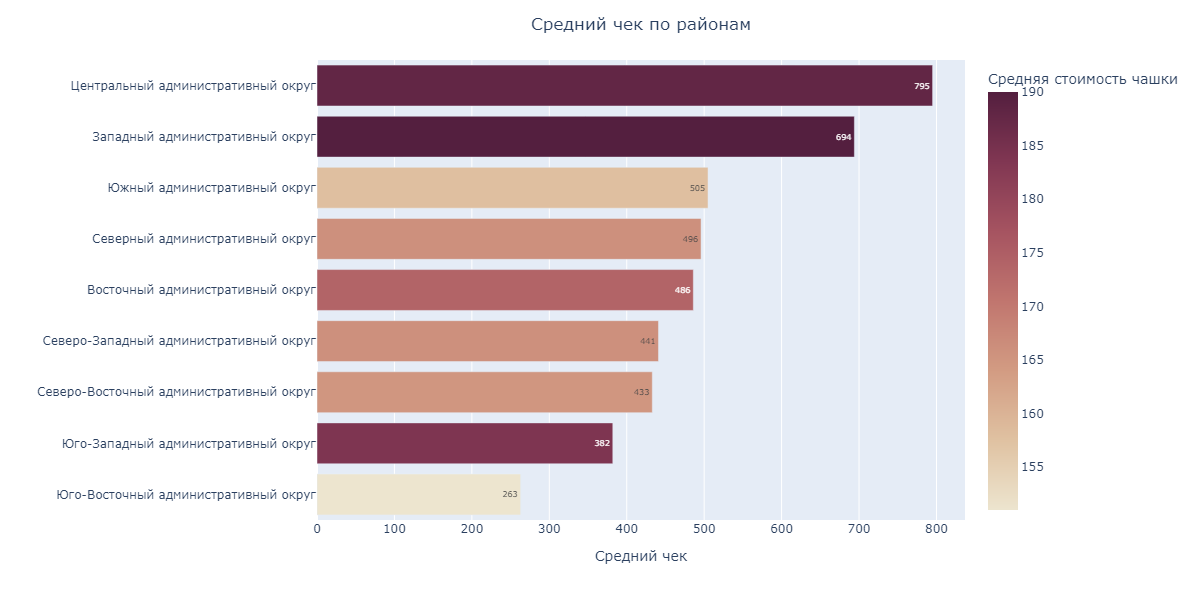

In [228]:
# среднее количество посадочных мест по районам и средняя стоимость чашки капучино в них
try:
    fig_seven = px.bar(extras, y='district', x='middle_avg_bill', 
                   color='middle_coffee_cup', 
                  color_continuous_scale='Brwnyl',
                 text_auto=True)

    fig_seven.update_yaxes(categoryorder='total ascending') #сортировка по оси у
    fig_seven.update_layout(xaxis_title='Средний чек', yaxis_title='') #заголовки осей
    fig_seven.update_traces(textfont_size=8, textangle=0, textposition='inside', cliponaxis=True) #подписи на столбцах
    fig_seven.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') #минимальный размер подписей на столбцах
    fig_seven.update_layout(title='Средний чек по районам', title_xref="paper", title_x=0.5) #положение заголовка
    fig_seven.update_layout(coloraxis_colorbar=dict(title="Средняя стоимость чашки")) #меняем заголовок легенды
    fig_seven.show(renderer='png', height=600, width=1200)
    
except:
    fig_seven = px.bar(extras, y='district', x='middle_avg_bill', 
                   color='middle_coffee_cup', 
                  color_continuous_scale='Brwnyl',)

    fig_seven.update_yaxes(categoryorder='total ascending') #сортировка по оси у
    fig_seven.update_layout(xaxis_title='Средний чек', yaxis_title='') #заголовки осей
    fig_seven.update_traces(textfont_size=8, textangle=0, textposition='inside', cliponaxis=True) #подписи на столбцах
    fig_seven.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') #минимальный размер подписей на столбцах
    fig_seven.update_layout(title='Средний чек по районам', title_xref="paper", title_x=0.5) #положение заголовка
    fig_seven.update_layout(coloraxis_colorbar=dict(title="Средняя стоимость чашки")) #меняем заголовок легенды
    fig_seven.show(renderer='png', height=600, width=1200)

В Центральном округе ожидаемо самый высокий средний чек, за ним следует Западный округ. Самый низкий средний чек в Юго-Восточном округе. Судя по всем параметрам выше, это неудачный округ для открытия кофейни.

### Рекомендации для открытия нового заведения

Наиболее удачный округ для открытия новой кофейни, судя по проведенному анализу, - это Западный. Всего в нем 150 заведений, причем 93 из них - сетевые. Покупателей может привлечь новое заведение с отличной от других концепцией. В Западном округе высокая средняя стоимость чашки капучино, а также высокий средний чек. Это позволит владельцам новой кофейни установить цены выше, чем в других районах (таких как, например, Юго-Восточный) и быстрее окупить затраты. Средняя стоимость чашки капучино в Западном округе составляет около 190 р., при открытии новой кофейни стоит ориентироваться на эту цифру. Можно понизить это число до 180, чтобы привлечь покупателей доступной ценой.

Презентация: https://disk.yandex.ru/i/Ua1Wv3d8CB_XlQ